## Geographic Analysis of Solar Market Potential

### -- Data Cleaning, Visualization, and Models

### Motivation

Solar business is booming! In the past decade, the compound growth rate for solar has been over 60% and this trend is expected to continue. So now is a great time for people to look for opportunities in this exciting industry. 
<img src="SolarConsumption.png", width = 550, height = 350>
But for solar business, particularly for solar panel installation and sales, it is critical to take the geographic advantages! So where is the best place to start or expand your solar business? Well, probably a better question is: What motivates customers to go solar?

Some obvious factors include: **Electricity Cost, Rooftop Suitability, Income Level, and Incentives**

In [189]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 6

#### 1. Electricity Cost

In [121]:
utility = pd.read_csv('utility_converted.csv')
print(utility.shape)
utility.head()

(39906, 7)


,zip,state,rate,lat,lon,city,income
0,501,NY,0.145826,NaN,NaN,NaN,NaN
1,544,NY,0.145826,NaN,NaN,NaN,NaN
2,1001,MA,0.145852,42.063696,-72.626944,Agawam,20140.44624
3,1002,MA,0.141980,42.340380,-72.496819,Amherst,14289.00282
4,1003,MA,0.145852,NaN,NaN,NaN,NaN


In [3]:
utility_byzip = utility[['zip', 'state', 'city', 'rate', 'lat', 'lon']]
utility_byzip.dropna(axis = 0, how = 'any', inplace = True)
print(utility_byzip.shape)

(28645, 6)


/Users/yanfeiwu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


/Users/yanfeiwu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


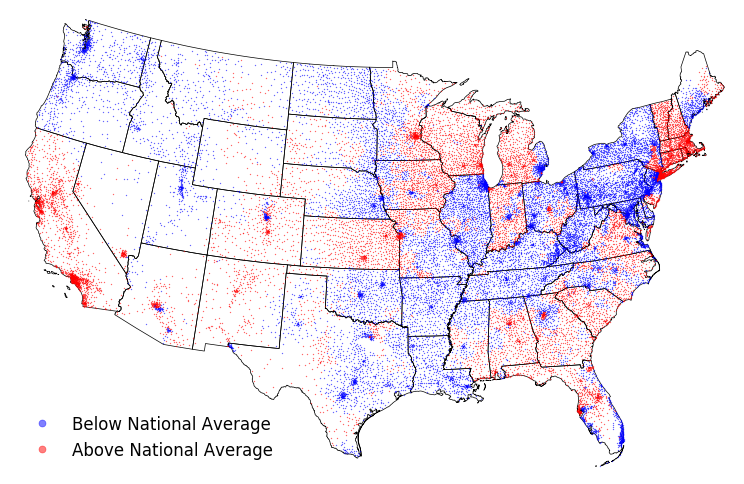

In [6]:
utility_byzip['color'] = utility_byzip.rate >= utility_byzip.rate.mean()

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile
map.readshapefile('st99_d00','states', drawbounds=True)
map.fillcontinents(color ='#ffffff')
map.drawmapboundary(color = 'w')

below = utility_byzip.loc[utility_byzip['color'] == False, ]
above = utility_byzip.loc[utility_byzip['color'] == True,]
below_lons = below.lon.values.tolist()
below_lats = below.lat.values.tolist()
above_lons = above.lon.values.tolist()
above_lats = above.lat.values.tolist()
below_x, below_y = map(below_lons, below_lats)
above_x, above_y = map(above_lons, above_lats)
map.plot(below_x, below_y, 'b.', markersize = 1, alpha = 0.5, label='Below National Average')
map.plot(above_x, above_y, 'r.', markersize = 1, alpha = 0.5, label='Above National Average')

plt.legend(markerscale = 10, fontsize = 12, numpoints=1, loc = 'lower left', frameon = False)

plt.savefig('utility_byzip.png', bbox_inches='tight')

In [199]:
utility_bystate = utility[['state', 'rate']]
utility_bystate.dropna(axis = 0, how = 'any', inplace = True)
print(utility_bystate.shape)

(39906, 2)


/Users/yanfeiwu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [200]:
utility_bystate = utility_bystate.groupby('state').mean().reset_index()
utility_bystate.head()

,state,rate
0,AK,0.307194
1,AL,0.119645
2,AR,0.100608
3,AZ,0.123306
4,CA,0.140218


In [33]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'}

In [35]:
utility_bystate['state'] = utility_bystate['state'].apply(lambda x: states[x])

In [43]:
utility_bystate.rate.min()

0.082562980111157244

In [44]:
utility_bystate.rate.max()

0.3080834499942155

In [37]:
bystate = utility_bystate.set_index('state').T.to_dict(orient='list')

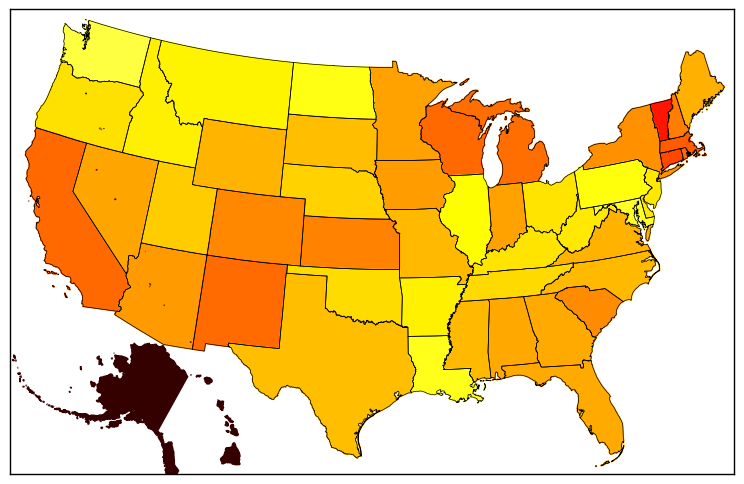

In [56]:
def offset_ak(coord):
    return (0.35*coord[0] + 1000000, 0.35*coord[1]-1350000)
def offset_hi(coord):
    return (coord[0] + 5100000, coord[1]-1400000)

m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile
shapeinfo = m.readshapefile('st99_d00','states', drawbounds=True)
       
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0.081; vmax = 0.34 # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        r = bystate[statename][0]
        colors[statename] = cmap(1.-np.sqrt((r-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)

ax = plt.gca()
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico', 'District of Columbia']:
    # Offset Alaska and Hawaii to the lower-left corner. 
        if statenames[nshape] == 'Alaska':
        # Alaska is too big. Scale it down to 35% first, then transate it. 
            seg = [offset_ak(item) for item in seg]
        if statenames[nshape] == 'Hawaii':
            seg = [offset_hi(item) for item in seg]

        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

In [196]:
# plotly

import plotly.plotly as py
py.sign_in('yanfei-wu', 'CsRXf9DvmhKeFC6unOvz')

In [197]:
utility_bystate.head()

,state,rate
0,Alaska,0.307194
1,Alabama,0.119645
2,Arkansas,0.100608
3,Arizona,0.123306
4,California,0.140218


In [203]:
utility_bystate['rate'] = utility_bystate['rate'].apply(lambda x: round(x, 2))

In [222]:
scl = [[0.0, 'rgb(255,255,204)'],[0.1, 'rgb(254,217,118)'], [0.2, 'rgb(253,141,60)'], \
       [0.5, 'rgb(189,0,38)'],[1.0, '#800026']]

utility_bystate['text'] = utility_bystate['state'] + ', ' + 'Average Electricity Rate: ' + utility_bystate['rate'].astype(str) + ' USD/kWh'

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = utility_bystate['state'],
        z = utility_bystate['rate'].astype(float),
        locationmode = 'USA-states',
        text = utility_bystate['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )),
        colorbar = dict(
            title = "Electricity Rate<br>USD/kWh")
        )]

layout = dict(
        title = 'Average Electricity Rate by State<br>(Hover for detail)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='utility-cloropleth-map' )

#### 2. Suitable Roof

In [140]:
roof = pd.read_csv('roof_converted.csv')
print(roof.shape)
roof.head()

(31285, 8)


,zip,state,city,area,pct.suitable,lat,lon,income
0,1001,MA,Agawam,91944.360000,0.437714,42.063696,-72.626944,20140.446240
1,1002,MA,Amherst,235264.714956,0.721028,42.340380,-72.496819,14289.002823
2,1003,NaN,NaN,12236.458753,0.737981,NaN,NaN,NaN
3,1005,MA,Barre,97263.192488,0.760034,42.422836,-72.105084,18354.249852
4,1007,MA,Belchertown,212683.306506,0.762852,42.287243,-72.402142,23382.437299


In [65]:
roof_byzip = roof[['zip', 'state', 'city', 'area', 'lat', 'lon']]
roof_byzip.dropna(axis = 0, how = 'any', inplace = True)
print(roof_byzip.shape)

(28882, 6)


/Users/yanfeiwu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


/Users/yanfeiwu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


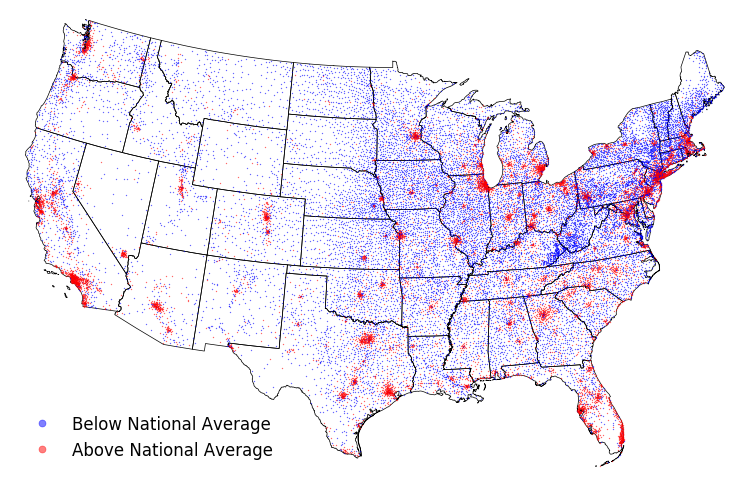

In [66]:
roof_byzip['color'] = roof_byzip.area >= roof_byzip.area.mean()

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile
map.readshapefile('st99_d00','states', drawbounds=True)
map.fillcontinents(color ='#ffffff')
map.drawmapboundary(color = 'w')

below = roof_byzip.loc[roof_byzip['color'] == False, ]
above = roof_byzip.loc[roof_byzip['color'] == True,]
below_lons = below.lon.values.tolist()
below_lats = below.lat.values.tolist()
above_lons = above.lon.values.tolist()
above_lats = above.lat.values.tolist()
below_x, below_y = map(below_lons, below_lats)
above_x, above_y = map(above_lons, above_lats)
map.plot(below_x, below_y, 'b.', markersize = 1, alpha = 0.5, label='Below National Average')
map.plot(above_x, above_y, 'r.', markersize = 1, alpha = 0.5, label='Above National Average')

plt.legend(markerscale = 10, fontsize = 12, numpoints=1, loc = 'lower left', frameon = False)

plt.savefig('roof_byzip.png', bbox_inches='tight')

In [232]:
roof_bystate = roof[['state', 'area']]
roof_bystate.dropna(axis = 0, how = 'any')
roof_bystate = roof_bystate.groupby('state').mean().reset_index()
roof_bystate.head()

,state,area
0,AL,133325.425631
1,AR,96201.343949
2,AZ,308305.575864
3,CA,306765.889742
4,CO,138330.189522


In [74]:
roof_bystate.shape

(49, 2)

In [68]:
roof_bystate['state'] = roof_bystate['state'].apply(lambda x: states[x])

In [70]:
print(roof_bystate.area.min())
print(roof_bystate.area.max())

38479.5993801
340801.971921


In [71]:
bystate_dict = roof_bystate.set_index('state').T.to_dict(orient='list')

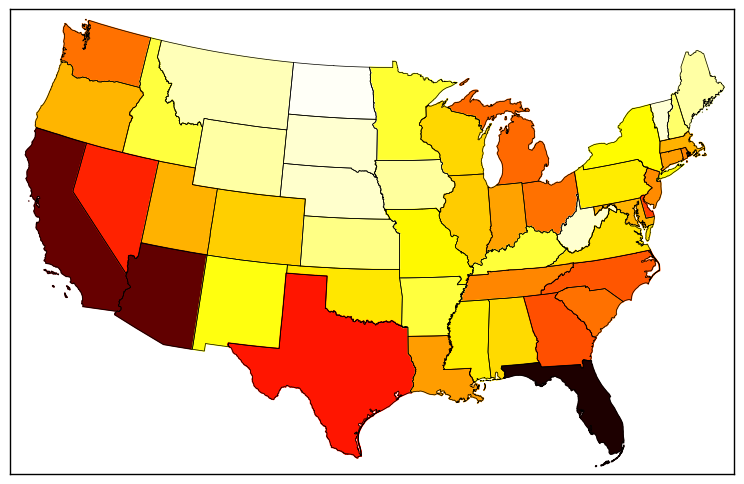

In [107]:
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile
shapeinfo = m.readshapefile('st99_d00','states', drawbounds=True)
       
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 35000; vmax = 350000 # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    if statename not in ['District of Columbia','Puerto Rico', 'Alaska', 'Hawaii']:
        a = bystate_dict[statename][0]
        colors[statename] = cmap(1.0-(a-vmin)/(vmax-vmin))[:3]
    statenames.append(statename)

ax = plt.gca() 
for nshape,seg in enumerate(m.states):
    if statenames[nshape] not in ['District of Columbia','Puerto Rico', 'Alaska', 'Hawaii']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

In [233]:
# plotly
roof_bystate['area'] = roof_bystate['area'].apply(lambda x: round(x/1000.0*247, 0))
roof_bystate.head()

,state,area
0,AL,32931.0
1,AR,23762.0
2,AZ,76151.0
3,CA,75771.0
4,CO,34168.0


In [238]:
scl = [[0.0, 'rgb(255,255,204)'],[0.25, 'rgb(254,217,118)'], [0.5, 'rgb(253,141,60)'], \
       [0.75, 'rgb(189,0,38)'],[1.0, '#800026']]

roof_bystate['text'] = roof_bystate['state'] + ', ' + 'Total Suitable Roof Area: ' + roof_bystate['area'].astype(str) + ' acre'

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = roof_bystate['state'],
        z = roof_bystate['area'].astype(float),
        locationmode = 'USA-states',
        text = roof_bystate['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )),
        colorbar = dict(
            title = "Total Roof Area<br>acre")
        )]

layout = dict(
        title = 'Total Suitable Rooftop Areas by State<br>(Hover for detail)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='roof-cloropleth-map' )

#### 3. Income Level

In [154]:
income_byzip = roof[['zip', 'state', 'city', 'lat', 'lon', 'income']]
pd.isnull(income_byzip).sum()

zip          0
state     2403
city      2403
lat       2403
lon       2403
income    6329
dtype: int64

In [155]:
income_byzip.dropna(axis = 0, how = 'any', inplace = True)
print(income_byzip.shape)

(24956, 6)


/Users/yanfeiwu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [165]:
income_byzip['income'] = income_byzip['income'].apply(lambda x: round(x, 0))

/Users/yanfeiwu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


/Users/yanfeiwu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


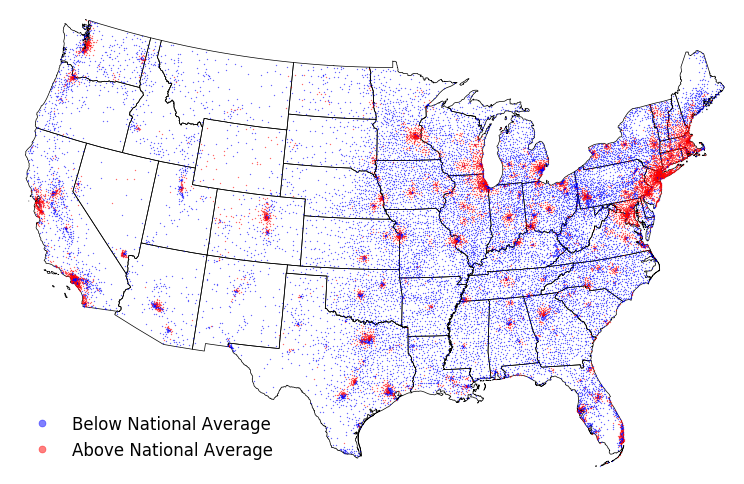

In [161]:
income_byzip['color'] = income_byzip.income >= income_byzip.income.mean()

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile
map.readshapefile('st99_d00','states', drawbounds=True)
map.fillcontinents(color ='#ffffff')
map.drawmapboundary(color = 'w')

below = income_byzip.loc[income_byzip['color'] == False, ]
above = income_byzip.loc[income_byzip['color'] == True,]
below_lons = below.lon.values.tolist()
below_lats = below.lat.values.tolist()
above_lons = above.lon.values.tolist()
above_lats = above.lat.values.tolist()
below_x, below_y = map(below_lons, below_lats)
above_x, above_y = map(above_lons, above_lats)
map.plot(below_x, below_y, 'b.', markersize = 1, alpha = 0.5, label='Below National Average')
map.plot(above_x, above_y, 'r.', markersize = 1, alpha = 0.5, label='Above National Average')

plt.legend(markerscale = 10, fontsize = 12, numpoints=1, loc = 'lower left', frameon = False)

plt.savefig('income_byzip.png', bbox_inches='tight')

In [239]:
income_bystate = income_byzip[['state', 'income']]
income_bystate = income_bystate.groupby('state').mean().reset_index()
income_bystate['income'] = income_bystate['income'].apply(lambda x: round(x, 0))
income_bystate.head()

,state,income
0,AL,13399.0
1,AR,11429.0
2,AZ,14487.0
3,CA,24061.0
4,CO,17697.0


In [168]:
income_bystate.shape

(49, 2)

In [169]:
income_bystate['state'] = income_bystate['state'].apply(lambda x: states[x])

In [170]:
print(income_bystate.income.min())
print(income_bystate.income.max())

11429.0
37767.0


In [171]:
income_bystate_dict = income_bystate.set_index('state').T.to_dict(orient='list')

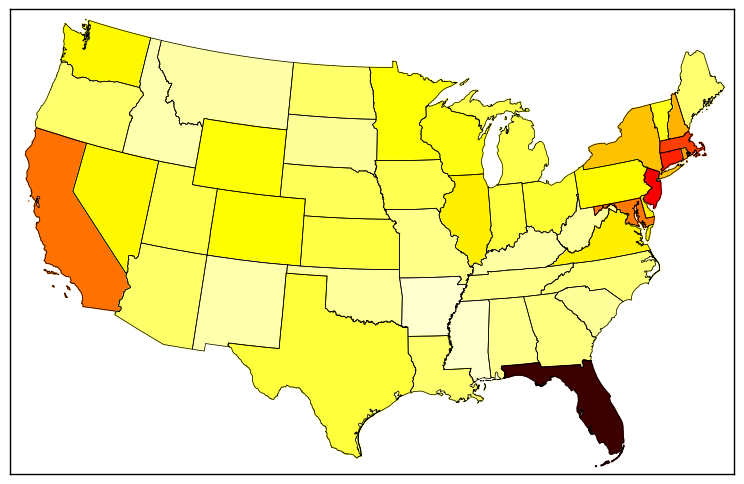

In [172]:
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile
shapeinfo = m.readshapefile('st99_d00','states', drawbounds=True)
       
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 10000; vmax = 40000 # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    if statename not in ['District of Columbia','Puerto Rico', 'Alaska', 'Hawaii']:
        i = income_bystate_dict[statename][0]
        colors[statename] = cmap(1.0-(i-vmin)/(vmax-vmin))[:3]
    statenames.append(statename)

ax = plt.gca() 
for nshape,seg in enumerate(m.states):
    if statenames[nshape] not in ['District of Columbia','Puerto Rico', 'Alaska', 'Hawaii']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

In [244]:
# plotly
scl = [[0.0, 'rgb(255,255,204)'],[0.15, 'rgb(254,217,118)'], [0.3, 'rgb(253,141,60)'], \
       [0.5, 'rgb(189,0,38)'],[1.0, '#800026']]

income_bystate['text'] = income_bystate['state'] + ', ' + 'Anual Income per Capita: ' + income_bystate['income'].astype(str) + ' USD'

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = income_bystate['state'],
        z = income_bystate['income'].astype(float),
        locationmode = 'USA-states',
        text = income_bystate['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )),
        colorbar = dict(
            title = "Annual Income per Capita<br>USD")
        )]

layout = dict(
        title = 'Income Level by State<br>(Hover for detail)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='income-cloropleth-map' )

#### 4. Incentives

In [178]:
incentive = pd.read_csv('incentive.csv')
incentive.head()

,NAME,incentive
0,Alabama,35
1,Alaska,24
2,Arizona,80
3,Arkansas,48
4,California,272


In [179]:
print(incentive.incentive.min())
print(incentive.incentive.max())

15
272


In [180]:
incentive_dict = incentive.set_index('NAME').T.to_dict(orient='list')

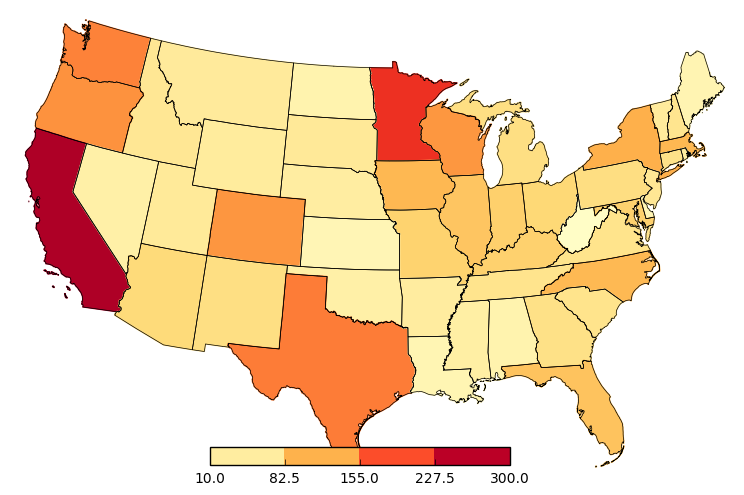

In [249]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, axisbg='w', frame_on=True)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile
shapeinfo = m.readshapefile('st99_d00','states', drawbounds=True)
m.drawmapboundary(color = 'w')
       
colors={}
statenames=[]
cmap = plt.cm.YlOrRd # use 'hot' colormap
vmin = 10; vmax = 300 # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    if statename not in ['District of Columbia','Puerto Rico', 'Alaska', 'Hawaii']:
        incent = incentive_dict[statename][0]
        colors[statename] = cmap((incent-vmin)/(vmax-vmin))[:3]
    statenames.append(statename)

ax = plt.gca() 
for nshape,seg in enumerate(m.states):
    if statenames[nshape] not in ['District of Columbia','Puerto Rico', 'Alaska', 'Hawaii']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

        bins = np.linspace(vmin, vmax, 5)
ax_legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')
cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])

plt.savefig('incentive.png', bbox_inches='tight')

#### Data Source